# Capstone x FC Köln - Analysis

## Install Packages

In [120]:
!python3 -m pip install pandas

In [121]:
!python3 -m pip install pyarrow

In [122]:
!python3 -m pip install matplotlib
import matplotlib.pyplot as plt

In [123]:
!python3 -m pip install scikit-learn

In [124]:
!python3 -m pip install seaborn

## Load Data sets

In [125]:
import pandas as pd

#Load the data

final_dataset = pd.read_csv("/Users/laurenzflender/Documents/Uni Köln/2. Semester/Capstone/Datasets/final_dataset.csv")

In [126]:
final_dataset.shape

(69991, 78)

In [127]:
# Drop Nan's in percentage played for evaluation regarding playing minutes
final_dataset = final_dataset.dropna(subset = ("percentage_played"))

In [128]:
final_dataset.columns

Index(['playerId', 'playerName', 'height', 'mainPosition', 'positionGroup',
       'foot', 'nationality', 'date', 'season', 'transferAge',
       'transfer_age_grouped', 'young_player_transfer', 'isLoan', 'wasLoan',
       'fee', 'marketvalue_closest', 'fee_to_value_ratio', 'foreign_transfer',
       'from_team', 'from_teamId', 'from_competition',
       'from_competition_competition_name',
       'from_competition_competition_area',
       'from_competition_competition_age_category',
       'from_competition_competition_level',
       'from_competition_competition_association', 'fromTeam_marketValue',
       'to_team', 'to_teamId', 'to_competition',
       'to_competition_competition_name', 'to_competition_competition_area',
       'to_competition_competition_age_category',
       'to_competition_competition_level',
       'to_competition_competition_association', 'toTeam_marketValue',
       'team_market_value_relation', 'start_date', 'end_date',
       'total_minutes_played', 'total

## Explore Transfer Routes

In [129]:
transfer_area_counts = final_dataset.groupby(["from_competition_competition_area", "to_competition_competition_area"]).size().reset_index(name="count")
transfer_area_counts = transfer_area_counts.sort_values("count", ascending=False)

In [130]:
# Most Common Transfer Routes outside of their own country
transfer_area_counts.head(10)

,from_competition_competition_area,to_competition_competition_area,count
511,Germany,Germany,4682
331,England,England,2790
685,Italy,Italy,1547
435,France,France,1503
1543,United States,United States,1272
1339,Spain,Spain,1134
1052,Portugal,Portugal,890
920,Netherlands,Netherlands,813
970,Norway,Norway,599
31,Austria,Austria,552


In [131]:
transfer_to_germany = transfer_area_counts[transfer_area_counts["to_competition_competition_area"] == "Germany"]

In [132]:
transfer_to_germany.head(10)

,from_competition_competition_area,to_competition_competition_area,count
511,Germany,Germany,4682
42,Austria,Germany,137
909,Netherlands,Germany,117
335,England,Germany,111
437,France,Germany,102
81,Belgium,Germany,79
1399,Switzerland,Germany,71
295,Denmark,Germany,50
681,Italy,Germany,49
218,Croatia,Germany,32


## Successful transfer routes

### Successful transfer routes by country into Germany

In [133]:
final_dataset.columns

Index(['playerId', 'playerName', 'height', 'mainPosition', 'positionGroup',
       'foot', 'nationality', 'date', 'season', 'transferAge',
       'transfer_age_grouped', 'young_player_transfer', 'isLoan', 'wasLoan',
       'fee', 'marketvalue_closest', 'fee_to_value_ratio', 'foreign_transfer',
       'from_team', 'from_teamId', 'from_competition',
       'from_competition_competition_name',
       'from_competition_competition_area',
       'from_competition_competition_age_category',
       'from_competition_competition_level',
       'from_competition_competition_association', 'fromTeam_marketValue',
       'to_team', 'to_teamId', 'to_competition',
       'to_competition_competition_name', 'to_competition_competition_area',
       'to_competition_competition_age_category',
       'to_competition_competition_level',
       'to_competition_competition_association', 'toTeam_marketValue',
       'team_market_value_relation', 'start_date', 'end_date',
       'total_minutes_played', 'total

In [134]:
success_df = final_dataset[["playerId", "playerName", "season", "from_competition_competition_area", "to_competition_competition_area", "success", "percentage_played", "from_competition_competition_name", "to_competition_competition_name", "nationality"]]


In [135]:
success_df.head(10)

,playerId,playerName,season,from_competition_competition_area,to_competition_competition_area,success,percentage_played,from_competition_competition_name,to_competition_competition_name,nationality
0,1257,Michael Ratajczak,2019,Germany,Germany,0,8.33,Bundesliga,2. Bundesliga,Germany
1,2857,Eldin Jakupović,2022,England,United States,0,10.00,Premier League,Major League Soccer,Switzerland
2,2865,Stephan Lichtsteiner,2019,England,Germany,0,48.24,Premier League,Bundesliga,Switzerland
3,3332,Wayne Rooney,2019,United States,England,1,97.52,Major League Soccer,Championship,England
4,3333,James Milner,2023,England,England,1,50.85,Premier League,Premier League,England
5,3455,Zlatan Ibrahimović,2019,United States,Italy,1,92.36,Major League Soccer,Serie A,Sweden
6,3498,Marko Dedovic,2022,Germany,Germany,1,51.05,Regionalliga West,Regionalliga Nord,Serbia
7,3539,Luke Steele,2019,England,England,0,0.00,Championship,Championship,England
8,3655,Joe Murphy,2019,NaN,England,0,14.29,NaN,League One,Ireland
9,3655,Joe Murphy,2020,England,England,0,28.54,League One,League Two,Ireland


In [136]:
transfer_success = (
    success_df
    .groupby(["from_competition_competition_area", "to_competition_competition_area"])
    .agg(
        success_rate=("success", "mean"),
        avg_percentage_played=("percentage_played", "mean"),
        transfers=("success", "count")
    )
    .reset_index()
)


In [137]:
transfer_success = transfer_success.sort_values(by="transfers", ascending=False)
transfer_success.head(10)

,from_competition_competition_area,to_competition_competition_area,success_rate,avg_percentage_played,transfers
511,Germany,Germany,0.605724,57.010895,4682
331,England,England,0.669534,60.899588,2790
685,Italy,Italy,0.539108,51.285688,1547
435,France,France,0.684631,62.539481,1503
1543,United States,United States,0.643868,59.675849,1272
1339,Spain,Spain,0.538801,52.618677,1134
1052,Portugal,Portugal,0.615730,56.846809,890
920,Netherlands,Netherlands,0.590406,57.397847,813
970,Norway,Norway,0.616027,58.398013,599
31,Austria,Austria,0.594203,58.292428,552


In [138]:
# Filter for only transfers to Germany
germany_transfers = transfer_success[transfer_success["to_competition_competition_area"] == "Germany"]
germany_transfers = germany_transfers[germany_transfers["transfers"] >= 10]
germany_transfers = germany_transfers.sort_values(by="avg_percentage_played", ascending=False)

In [139]:
# Sorted by playing percentage
germany_transfers.head(10)

,from_competition_competition_area,to_competition_competition_area,success_rate,avg_percentage_played,transfers
822,Luxembourg,Germany,0.650000,61.641500,20
551,Greece,Germany,0.727273,61.018182,11
1171,Scotland,Germany,0.600000,60.989000,10
1038,Portugal,Germany,0.615385,60.873462,26
295,Denmark,Germany,0.620000,58.096800,50
511,Germany,Germany,0.605724,57.010895,4682
335,England,Germany,0.594595,56.982162,111
909,Netherlands,Germany,0.572650,56.463248,117
681,Italy,Germany,0.612245,56.453673,49
1114,Russia,Germany,0.562500,55.539375,16


In [140]:
germany_transfers = germany_transfers.sort_values(by="success_rate", ascending=False)
germany_transfers.head(10)

,from_competition_competition_area,to_competition_competition_area,success_rate,avg_percentage_played,transfers
551,Greece,Germany,0.727273,61.018182,11
822,Luxembourg,Germany,0.650000,61.641500,20
295,Denmark,Germany,0.620000,58.096800,50
1038,Portugal,Germany,0.615385,60.873462,26
681,Italy,Germany,0.612245,56.453673,49
511,Germany,Germany,0.605724,57.010895,4682
1171,Scotland,Germany,0.600000,60.989000,10
81,Belgium,Germany,0.594937,54.990000,79
335,England,Germany,0.594595,56.982162,111
218,Croatia,Germany,0.593750,51.524687,32


In [141]:
plt_1 = germany_transfers.sort_values("success_rate", ascending = False).head(10)

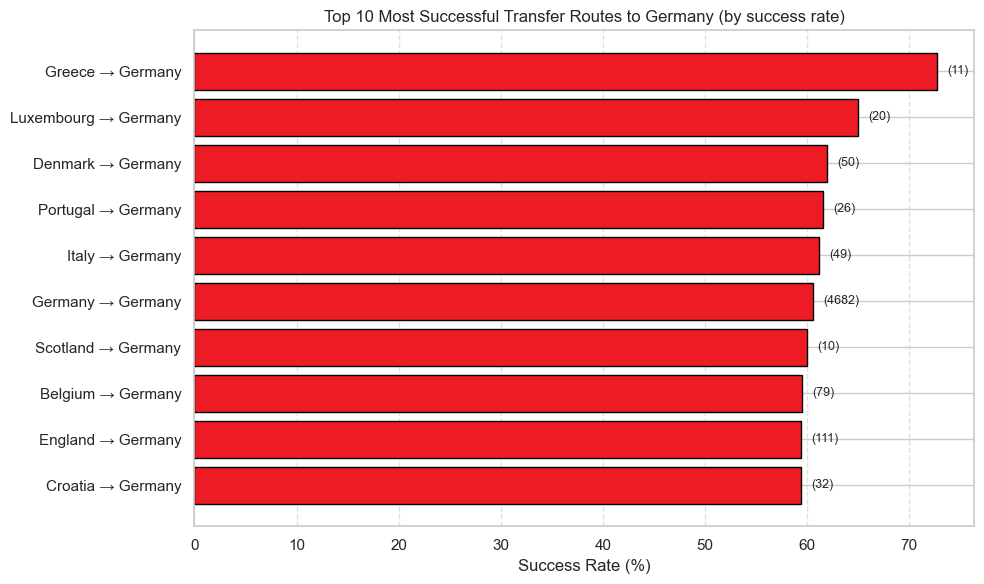

In [142]:
plt.figure(figsize=(10, 6))
bars = plt.barh(
    plt_1["from_competition_competition_area"] + " → " + plt_1["to_competition_competition_area"],
    plt_1["success_rate"] * 100,
    color="#ED1C24", edgecolor="black"
)

# Add labels for transfer counts
for i, (bar, transfers) in enumerate(zip(bars, plt_1["transfers"])):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"({transfers})", va="center", fontsize=9)

plt.xlabel("Success Rate (%)")
plt.title("Top 10 Most Successful Transfer Routes to Germany (by success rate)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [143]:
from_greece = final_dataset[(final_dataset["from_competition_competition_area"] == "Greece") & (final_dataset["to_competition_competition_area"] == "Germany")]

In [144]:
from_greece = from_greece.sort_values(by ="season", ascending = True)
print(from_greece[["playerName", "season"]])

                     playerName  season
16292           Marko Mihojevic    2019
5658                Niklas Hult    2020
11611          Leonardo Koutris    2020
25153         Dimitrios Limnios    2020
17170          Manolis Saliakas    2022
24194         Diadié Samassékou    2022
43095           Juan José Perea    2022
8885        Andreas Bouchalakis    2023
27467          Roberts Uldrikis    2024
56314  Konstantinos Koulierakis    2024
66229           Stefanos Tzimas    2024


In [145]:
plt_2 = germany_transfers.sort_values("avg_percentage_played", ascending = False).head(10)

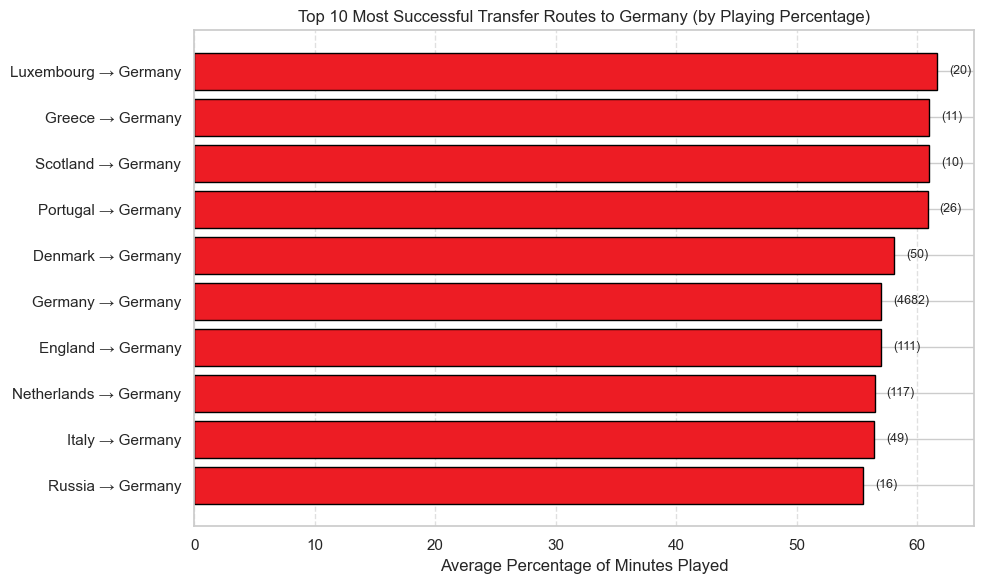

In [146]:
# Plot of Top 10 Transfer Routes to Germany by Average Plaing Time
plt.figure(figsize=(10, 6))
bars = plt.barh(
    plt_2["from_competition_competition_area"] + " → " + plt_2["to_competition_competition_area"],
    plt_2["avg_percentage_played"],
    color="#ED1C24", edgecolor="black"
)

# Add labels for transfer counts
for i, (bar, transfers) in enumerate(zip(bars, plt_2["transfers"])):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"({transfers})", va="center", fontsize=9)

plt.xlabel("Average Percentage of Minutes Played")
plt.title("Top 10 Most Successful Transfer Routes to Germany (by Playing Percentage)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Successful transfer routes into Bundesliga by League

In [147]:
transfer_league_counts = final_dataset.groupby(["from_competition_competition_name", "to_competition_competition_name"]).size().reset_index(name="count")
transfer_league_counts = transfer_league_counts.sort_values("count", ascending=False)
#transfer_league_counts = transfer_league_counts[transfer_league_counts["from_competition_competition_name"] != transfer_league_counts["to_competition_competition_name"]]

In [148]:
transfer_league_counts.head(10)

,from_competition_competition_name,to_competition_competition_name,count
2206,Serie A,Serie B,623
1773,Premier Liga,Premier Liga,552
2205,Serie A,Serie A,461
2111,Saudi Pro League,Saudi Pro League,431
851,J1 League,J1 League,392
1033,LaLiga,LaLiga2,390
659,Chance Liga,Chance Liga,369
2440,Super Liga Srbije,Super Liga Srbije,354
1141,League Two,League Two,349
2493,SuperLiga,SuperLiga,345


In [149]:
success_df.columns

Index(['playerId', 'playerName', 'season', 'from_competition_competition_area',
       'to_competition_competition_area', 'success', 'percentage_played',
       'from_competition_competition_name', 'to_competition_competition_name',
       'nationality'],
      dtype='object')

In [150]:
success_df['from_competition_full'] = success_df['from_competition_competition_name'].str.strip() + ' (' + success_df['from_competition_competition_area'].str.strip() + ')'

/var/folders/rd/fb2n60jd06v401vrvh1st6zh0000gn/T/ipykernel_29958/3311179590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_df['from_competition_full'] = success_df['from_competition_competition_name'].str.strip() + ' (' + success_df['from_competition_competition_area'].str.strip() + ')'


In [151]:
transfer_league_success = (
    success_df
    .groupby(["from_competition_full", "to_competition_competition_name"])
    .agg(
        success_rate=("success", "mean"),
        avg_percentage_played=("percentage_played", "mean"),
        transfers=("success", "count")
    )
    .reset_index()
)

In [152]:
transfer_league_success = transfer_league_success.sort_values(by="transfers", ascending=False)
transfer_league_success.head(10)

,from_competition_full,to_competition_competition_name,success_rate,avg_percentage_played,transfers
2241,Serie A (Italy),Serie B,0.548957,51.530498,623
2240,Serie A (Italy),Serie A,0.535792,51.955401,461
2146,Saudi Pro League (Saudi Arabia),Saudi Pro League,0.371230,41.053225,431
851,J1 League (Japan),J1 League,0.640306,58.606837,392
1033,LaLiga (Spain),LaLiga2,0.597436,57.142128,390
659,Chance Liga (Czech Republic),Chance Liga,0.588076,56.399187,369
2475,Super Liga Srbije (Serbia),Super Liga Srbije,0.573446,53.530452,354
1141,League Two (England),League Two,0.747851,65.926189,349
2528,SuperLiga (Romania),SuperLiga,0.533333,52.115478,345
1111,League One (England),League Two,0.742690,66.735760,342


In [153]:
# Filter for only transfers to Germany
germany_league_transfers = transfer_league_success[
    transfer_league_success["to_competition_competition_name"].isin([
        "Bundesliga" ])] #, "2. Bundesliga", "3. Bundesliga"])]
germany_league_transfers = germany_league_transfers[germany_league_transfers["transfers"] >= 10]
germany_league_transfers = germany_league_transfers.sort_values(by="avg_percentage_played", ascending=False)

In [154]:
germany_league_transfers.head(10)

,from_competition_full,to_competition_competition_name,success_rate,avg_percentage_played,transfers
1181,Liga Portugal (Portugal),Bundesliga,0.562500,63.843125,16
401,Bundesliga (Germany),Bundesliga,0.634361,57.430352,227
1691,Premier League (England),Bundesliga,0.631579,57.326491,57
2209,Serie A (Italy),Bundesliga,0.607143,54.486429,28
879,Jupiler Pro League (Belgium),Bundesliga,0.583333,53.566111,36
1330,Ligue 1 (France),Bundesliga,0.540541,52.522027,74
1746,Premier Liga (Russia),Bundesliga,0.500000,52.045833,12
751,Eredivisie (Netherlands),Bundesliga,0.465116,50.632093,43
2636,Superliga (Denmark),Bundesliga,0.444444,50.142778,18
605,Championship (England),Bundesliga,0.333333,49.368333,18


In [155]:
germany_league_transfers

,from_competition_full,to_competition_competition_name,success_rate,avg_percentage_played,transfers
1181,Liga Portugal (Portugal),Bundesliga,0.562500,63.843125,16
401,Bundesliga (Germany),Bundesliga,0.634361,57.430352,227
1691,Premier League (England),Bundesliga,0.631579,57.326491,57
2209,Serie A (Italy),Bundesliga,0.607143,54.486429,28
879,Jupiler Pro League (Belgium),Bundesliga,0.583333,53.566111,36
1330,Ligue 1 (France),Bundesliga,0.540541,52.522027,74
1746,Premier Liga (Russia),Bundesliga,0.500000,52.045833,12
751,Eredivisie (Netherlands),Bundesliga,0.465116,50.632093,43
2636,Superliga (Denmark),Bundesliga,0.444444,50.142778,18
605,Championship (England),Bundesliga,0.333333,49.368333,18


In [156]:
# plot the worst transfer markets for Buli
plt_worst = germany_league_transfers.sort_values("avg_percentage_played", ascending = True).head(10)

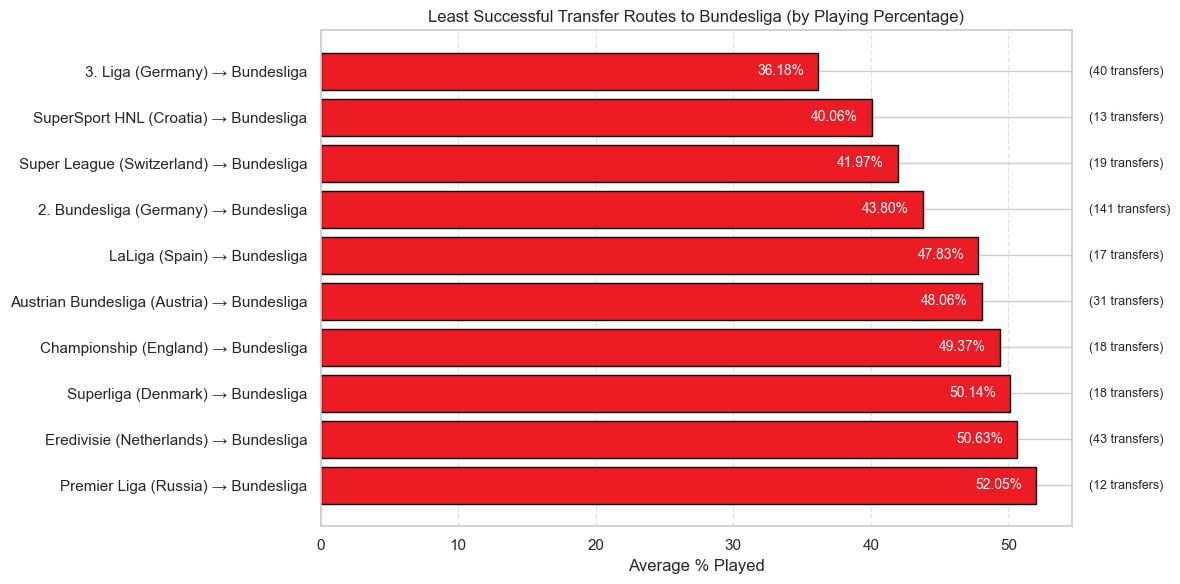

In [157]:
x_fixed = plt_worst["avg_percentage_played"].max() + 3.8  # adjust 0.05 as needed

plt.figure(figsize=(12, 6))
bars = plt.barh(
    plt_worst["from_competition_full"] + " → " + plt_worst["to_competition_competition_name"],
    plt_worst["avg_percentage_played"],
    color="#ED1C24", edgecolor="black"
)

# Add labels for transfer counts
for i, (bar, transfers, avg_percentage_played) in enumerate(zip(bars, plt_worst["transfers"], plt_worst["avg_percentage_played"])):
    plt.text(x_fixed, bar.get_y() + bar.get_height()/2,
             f"({transfers} transfers)", va="center", fontsize=9)
    plt.text(
        bar.get_width() - 1,  # a bit before the end of the bar
        bar.get_y() + bar.get_height() / 2,
        f"{avg_percentage_played:.2f}%",
        va="center", ha="right", color="white", fontsize=10
    )

plt.xlabel("Average % Played")
plt.title("Least Successful Transfer Routes to Bundesliga (by Playing Percentage)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [158]:
# Plot them
plt_3 = germany_league_transfers.sort_values("avg_percentage_played", ascending = False).head(10)

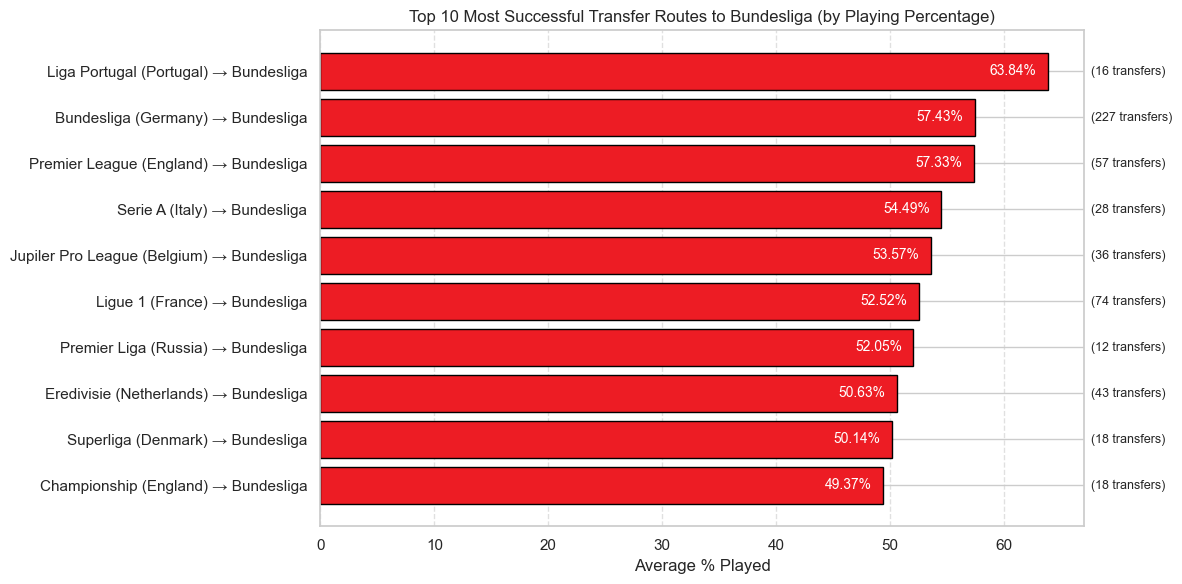

In [159]:
x_fixed = plt_3["avg_percentage_played"].max() + 3.8  # adjust 0.05 as needed

plt.figure(figsize=(12, 6))
bars = plt.barh(
    plt_3["from_competition_full"] + " → " + plt_3["to_competition_competition_name"],
    plt_3["avg_percentage_played"],
    color="#ED1C24", edgecolor="black"
)

# Add labels for transfer counts
for i, (bar, transfers, avg_percentage_played) in enumerate(zip(bars, plt_3["transfers"], plt_3["avg_percentage_played"])):
    plt.text(x_fixed, bar.get_y() + bar.get_height()/2,
             f"({transfers} transfers)", va="center", fontsize=9)
    plt.text(
        bar.get_width() - 1,  # a bit before the end of the bar
        bar.get_y() + bar.get_height() / 2,
        f"{avg_percentage_played:.2f}%",
        va="center", ha="right", color="white", fontsize=10
    )

plt.xlabel("Average % Played")
plt.title("Top 10 Most Successful Transfer Routes to Bundesliga (by Playing Percentage)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

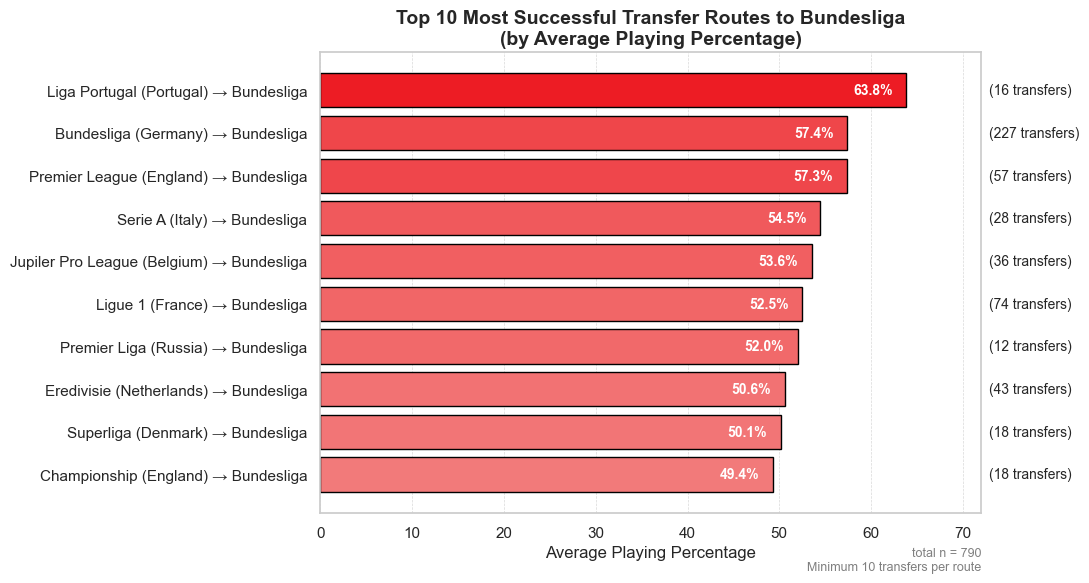

In [160]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Normalize values
norm = mcolors.Normalize(
    vmin=plt_3["avg_percentage_played"].min(),
    vmax=plt_3["avg_percentage_played"].max()
)

# Color gradient: light red to strong red
cmap = mcolors.LinearSegmentedColormap.from_list("custom_red", ["#f27a7a", "#ED1C24"])
colors = [cmap(norm(value)) for value in plt_3["avg_percentage_played"]]

# X-position for external labels
x_fixed = plt_3["avg_percentage_played"].max() + 9

# Total number of transfers
total_n = germany_league_transfers["transfers"].sum()

# Create plot
plt.figure(figsize=(12, 6))
bars = plt.barh(
    plt_3["from_competition_full"] + " → " + plt_3["to_competition_competition_name"],
    plt_3["avg_percentage_played"],
    color=colors,
    edgecolor="black"
)

# Add text annotations
for bar, transfers, avg_percentage_played in zip(bars, plt_3["transfers"], plt_3["avg_percentage_played"]):
    plt.text(
        x_fixed,
        bar.get_y() + bar.get_height() / 2,
        f"({transfers} transfers)",
        va="center", fontsize=10
    )
    plt.text(
        bar.get_width() - 1.5,
        bar.get_y() + bar.get_height() / 2,
        f"{avg_percentage_played:.1f}%",
        va="center", ha="right", color="white", fontsize=10, weight='bold'
    )

# Title and axes
plt.title("Top 10 Most Successful Transfer Routes to Bundesliga\n(by Average Playing Percentage)", fontsize=14, weight='bold')
plt.xlabel("Average Playing Percentage", fontsize=12)
plt.xlim(0, 72)
plt.gca().invert_yaxis()

# Grid styling
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, color='gray', alpha=0.3)
plt.grid(False, axis='y')  # remove horizontal lines

# Bottom-right subtitle
plt.text(
    plt.xlim()[1],
    plt.ylim()[0] + 0.8,
    f"total n = {total_n}\nMinimum 10 transfers per route",
    ha='right', va='top',
    fontsize=9, color='gray'
)

# Layout
plt.tight_layout()
plt.subplots_adjust(left=0.35)
#plt.show()
plt.savefig("Leagues.png", dpi=300, bbox_inches='tight')

In [161]:
Port_to_Bund = final_dataset[(final_dataset['from_competition_competition_name'] == 'Liga Portugal') & (final_dataset['to_competition_competition_name'] == 'Bundesliga')]

In [162]:
Port_to_Bund.columns

Index(['playerId', 'playerName', 'height', 'mainPosition', 'positionGroup',
       'foot', 'nationality', 'date', 'season', 'transferAge',
       'transfer_age_grouped', 'young_player_transfer', 'isLoan', 'wasLoan',
       'fee', 'marketvalue_closest', 'fee_to_value_ratio', 'foreign_transfer',
       'from_team', 'from_teamId', 'from_competition',
       'from_competition_competition_name',
       'from_competition_competition_area',
       'from_competition_competition_age_category',
       'from_competition_competition_level',
       'from_competition_competition_association', 'fromTeam_marketValue',
       'to_team', 'to_teamId', 'to_competition',
       'to_competition_competition_name', 'to_competition_competition_area',
       'to_competition_competition_age_category',
       'to_competition_competition_level',
       'to_competition_competition_association', 'toTeam_marketValue',
       'team_market_value_relation', 'start_date', 'end_date',
       'total_minutes_played', 'total

In [163]:
Port_to_Bund = Port_to_Bund.sort_values(by = 'season', ascending = True)
print(Port_to_Bund[["playerName", "season", "percentage_played"]])

               playerName  season  percentage_played
1918             Bas Dost    2019              68.33
48556      Edmond Tapsoba    2019              83.89
37280        Tiago Dantas    2020              29.33
12616    Luca Waldschmidt    2021              39.89
52667         Tiago Tomás    2021              85.71
6444          John Brooks    2022              88.24
12697        Julian Weigl    2022              87.78
25667            Gil Dias    2022              44.67
29532         Diogo Leite    2022              83.44
43808    Eduardo Quaresma    2022              29.87
12277  Alejandro Grimaldo    2023              93.87
12698        Julian Weigl    2023              99.14
29533         Diogo Leite    2023              93.99
43294       David Jurásek    2023              34.03
52668         Tiago Tomás    2023              40.79
27608        Niklas Beste    2024              18.52


In [164]:
plt_worst2 = germany_league_transfers.sort_values("success_rate", ascending = True).head(10)

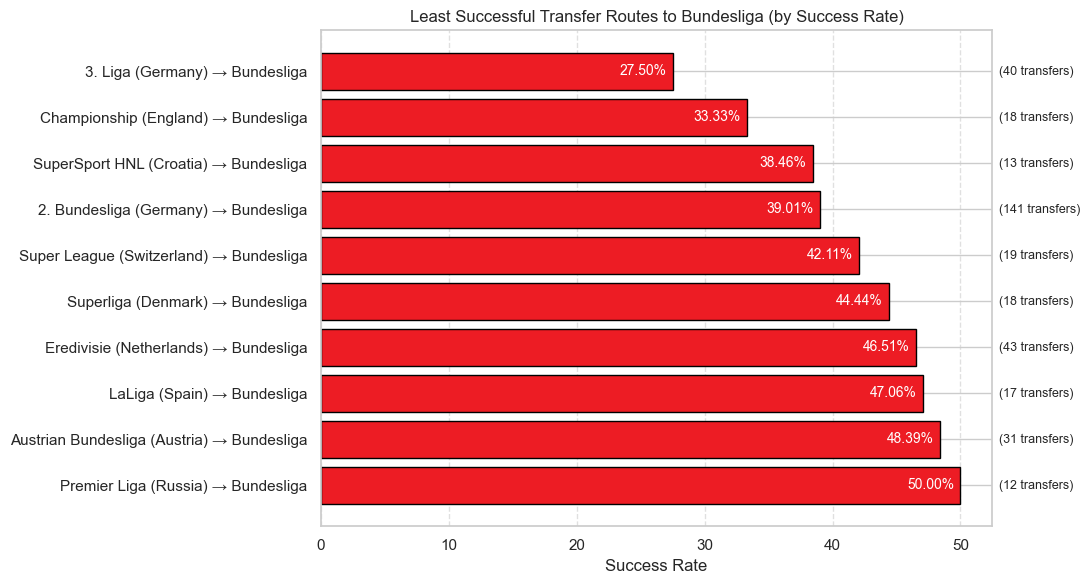

In [165]:
import matplotlib.pyplot as plt

x_fixed = plt_worst2["success_rate"].max() + 52.5 # adjust 0.05 as needed

# Create a wider figure to give room for labels
plt.figure(figsize=(12, 6))

# Create horizontal bar chart
bars = plt.barh(
    plt_worst2["from_competition_full"] + " → " + plt_worst2["to_competition_competition_name"],
    plt_worst2["success_rate"] *100,
    color="#ED1C24",
    edgecolor="black"
)

# Add labels for number of transfers and success rate
for i, (bar, transfers, success_rate) in enumerate(zip(bars, plt_worst2["transfers"], plt_worst2["success_rate"])):
    # Label for number of transfers (outside bar)
    plt.text(
        x_fixed,
        bar.get_y() + bar.get_height() / 2,
        f"({transfers} transfers)",
        va="center", fontsize=9
    )
    
    # Label for success rate (inside bar, in white)
    plt.text(
        bar.get_width() - 0.5,  # a bit before the end of the bar
        bar.get_y() + bar.get_height() / 2,
        f"{success_rate*100:.2f}%",
        va="center", ha="right", color="white", fontsize=10
    )

# Axis labels and title
plt.xlabel("Success Rate")
plt.title("Least Successful Transfer Routes to Bundesliga (by Success Rate)")

# Invert y-axis to show highest value at top
plt.gca().invert_yaxis()

# Add grid for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Apply layout adjustments
plt.tight_layout()
plt.subplots_adjust(left=0.35)  # Shift plot to the right for long labels

# Show the plot
plt.show()

In [166]:
plt_4 = germany_league_transfers.sort_values("success_rate", ascending = False).head(10)

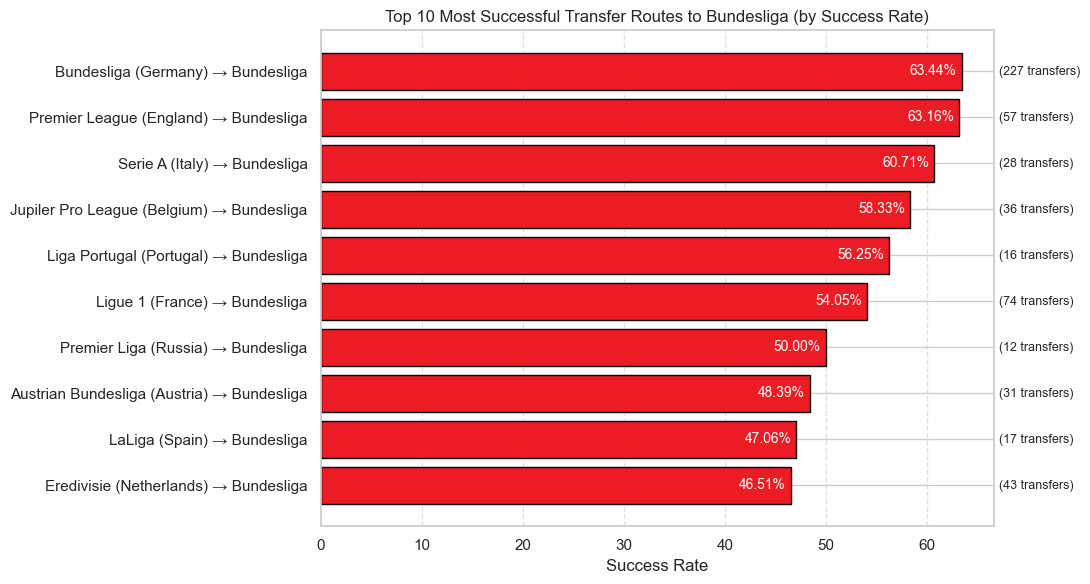

In [167]:
import matplotlib.pyplot as plt

x_fixed = plt_4["success_rate"].max() + 66.5  # adjust 0.05 as needed

# Create a wider figure to give room for labels
plt.figure(figsize=(12, 6))

# Create horizontal bar chart
bars = plt.barh(
    plt_4["from_competition_full"] + " → " + plt_4["to_competition_competition_name"],
    plt_4["success_rate"] *100,
    color="#ED1C24",
    edgecolor="black"
)

# Add labels for number of transfers and success rate
for i, (bar, transfers, success_rate) in enumerate(zip(bars, plt_4["transfers"], plt_4["success_rate"])):
    # Label for number of transfers (outside bar)
    plt.text(
        x_fixed,
        bar.get_y() + bar.get_height() / 2,
        f"({transfers} transfers)",
        va="center", fontsize=9
    )
    
    # Label for success rate (inside bar, in white)
    plt.text(
        bar.get_width() - 0.5,  # a bit before the end of the bar
        bar.get_y() + bar.get_height() / 2,
        f"{success_rate*100:.2f}%",
        va="center", ha="right", color="white", fontsize=10
    )

# Axis labels and title
plt.xlabel("Success Rate")
plt.title("Top 10 Most Successful Transfer Routes to Bundesliga (by Success Rate)")

# Invert y-axis to show highest value at top
plt.gca().invert_yaxis()

# Add grid for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Apply layout adjustments
plt.tight_layout()
plt.subplots_adjust(left=0.35)  # Shift plot to the right for long labels

# Show the plot
plt.show()


## Most successful nationalities coming into BuLi

In [168]:
nationality_success = (
    success_df
    .groupby(["nationality", "to_competition_competition_name"])
    .agg(
        success_rate=("success", "mean"),
        avg_percentage_played=("percentage_played", "mean"),
        transfers=("success", "count")
    )
    .reset_index()
)

In [169]:
nationality_success = nationality_success.sort_values(by = 'transfers', ascending = False)
nationality_success.head(10)

,nationality,to_competition_competition_name,success_rate,avg_percentage_played,transfers
2586,Italy,Serie B,0.485455,46.268545,1100
1609,England,League Two,0.626374,58.017216,1092
1918,Germany,3. Liga,0.561644,53.732828,1022
4387,Spain,LaLiga2,0.546843,53.021721,982
4151,Serbia,Super Liga Srbije,0.515487,48.878473,904
1959,Germany,Regionalliga West,0.564302,53.955831,902
1608,England,League One,0.642857,57.283946,882
2643,Japan,J1 League,0.483466,47.225724,877
1778,France,Championnat National,0.694700,64.273802,868
1957,Germany,Regionalliga Nordost,0.597340,55.260230,827


In [170]:
nationality_to_buli = nationality_success[nationality_success["to_competition_competition_name"] == "Bundesliga"]
nationality_to_buli.head(10)

,nationality,to_competition_competition_name,success_rate,avg_percentage_played,transfers
1923,Germany,Bundesliga,0.507082,49.548102,353
1774,France,Bundesliga,0.492063,50.327302,63
310,Austria,Bundesliga,0.571429,53.840476,42
3320,Netherlands,Bundesliga,0.500000,52.700833,36
1443,Denmark,Bundesliga,0.343750,44.322812,32
1225,Croatia,Bundesliga,0.538462,47.725385,26
4558,Switzerland,Bundesliga,0.640000,61.276000,25
419,Belgium,Bundesliga,0.600000,55.193600,25
3813,Portugal,Bundesliga,0.473684,53.961579,19
2636,Japan,Bundesliga,0.764706,67.568235,17


In [171]:
plt_to_buli = nationality_to_buli[nationality_to_buli["transfers"] >= 10]
plt_to_buli = plt_to_buli.sort_values("success_rate", ascending = False).head(10)

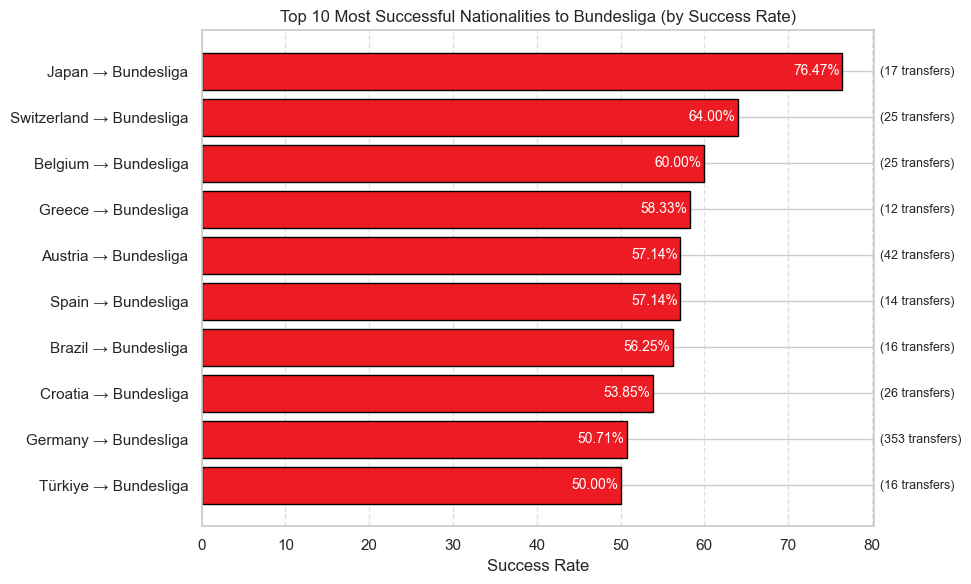

In [172]:
import matplotlib.pyplot as plt

x_fixed = (plt_to_buli["success_rate"]*100).max() + 4.5  # adjust 0.05 as needed

# Create a wider figure to give room for labels
plt.figure(figsize=(12, 6))

# Create horizontal bar chart
bars = plt.barh(
    plt_to_buli["nationality"] + " → " + plt_to_buli["to_competition_competition_name"],
    plt_to_buli["success_rate"] *100,
    color="#ED1C24",
    edgecolor="black"
)

# Add labels for number of transfers and success rate
for i, (bar, transfers, success_rate) in enumerate(zip(bars, plt_to_buli["transfers"], plt_to_buli["success_rate"])):
    # Label for number of transfers (outside bar)
    plt.text(
        x_fixed,
        bar.get_y() + bar.get_height() / 2,
        f"({transfers} transfers)",
        va="center", fontsize=9
    )
    
    # Label for success rate (inside bar, in white)
    plt.text(
        bar.get_width() - 0.3,  # a bit before the end of the bar
        bar.get_y() + bar.get_height() / 2,
        f"{success_rate*100:.2f}%",
        va="center", ha="right", color="white", fontsize=10
    )

# Axis labels and title
plt.xlabel("Success Rate")
plt.title("Top 10 Most Successful Nationalities to Bundesliga (by Success Rate)")

# Invert y-axis to show highest value at top
plt.gca().invert_yaxis()

# Add grid for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Apply layout adjustments
plt.tight_layout()
plt.subplots_adjust(left=0.35)  # Shift plot to the right for long labels

# Show the plot
plt.show()

In [173]:
plt_to_buli_2 = plt_to_buli.sort_values("avg_percentage_played", ascending = False).head(10)

In [174]:
plt_to_buli_2.head(10)

,nationality,to_competition_competition_name,success_rate,avg_percentage_played,transfers
2636,Japan,Bundesliga,0.764706,67.568235,17
4558,Switzerland,Bundesliga,0.640000,61.276000,25
419,Belgium,Bundesliga,0.600000,55.193600,25
310,Austria,Bundesliga,0.571429,53.840476,42
4372,Spain,Bundesliga,0.571429,53.732143,14
601,Brazil,Bundesliga,0.562500,52.957500,16
4832,Türkiye,Bundesliga,0.500000,49.875625,16
1923,Germany,Bundesliga,0.507082,49.548102,353
2056,Greece,Bundesliga,0.583333,49.438333,12
1225,Croatia,Bundesliga,0.538462,47.725385,26


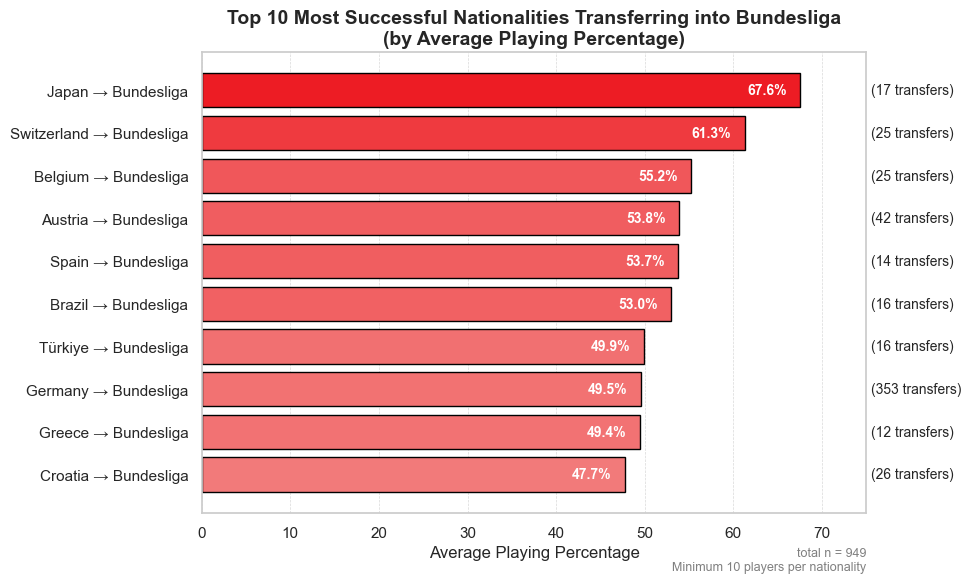

In [175]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Normalize values
norm = mcolors.Normalize(
    vmin=plt_to_buli_2["avg_percentage_played"].min(),
    vmax=plt_to_buli_2["avg_percentage_played"].max()
)

# Adjusted gradient: muted light red → strong red
cmap = mcolors.LinearSegmentedColormap.from_list("custom_red", ["#f27a7a", "#ED1C24"])

# Apply color mapping
colors = [cmap(norm(value)) for value in plt_to_buli_2["avg_percentage_played"]]

# X-position for external labels
x_fixed = plt_to_buli_2["avg_percentage_played"].max() + 8

#get total n
#total_n = nationality_to_buli["transfers"].sum()
total_n = final_dataset[final_dataset["to_competition_competition_name"] == "Bundesliga"].shape[0]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(
    plt_to_buli_2["nationality"] + " → " + plt_to_buli_2["to_competition_competition_name"],
    plt_to_buli_2["avg_percentage_played"],
    color=colors,
    edgecolor="black"
)

# Add text annotations
for bar, transfers, avg_percentage_played in zip(bars, plt_to_buli_2["transfers"], plt_to_buli_2["avg_percentage_played"]):
    plt.text(
        x_fixed,
        bar.get_y() + bar.get_height() / 2,
        f"({transfers} transfers)",
        va="center", fontsize=10
    )
    plt.text(
        bar.get_width() - 1.5,
        bar.get_y() + bar.get_height() / 2,
        f"{avg_percentage_played:.1f}%",
        va="center", ha="right", color="white", fontsize=10, weight='bold'
    )


# Title, axis labels, grid
plt.title("Top 10 Most Successful Nationalities Transferring into Bundesliga\n(by Average Playing Percentage)", fontsize=14, weight='bold')
plt.xlabel("Average Playing Percentage", fontsize=12)
plt.xlim(0, 75)
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, color='gray', alpha=0.3)

plt.text(
    plt.xlim()[1],
    plt.ylim()[0] + 0.8,
    f"total n = {total_n}\nMinimum 10 players per nationality",
    ha='right', va='top',
    fontsize=9, color='gray'
)

plt.grid(False, axis='y')  # turns off vertical grid lines

# Layout
plt.tight_layout()
plt.subplots_adjust(left=0.35)
#plt.show()
plt.savefig("Nationality.png", dpi=300, bbox_inches='tight')

In [176]:
final_dataset.columns

Index(['playerId', 'playerName', 'height', 'mainPosition', 'positionGroup',
       'foot', 'nationality', 'date', 'season', 'transferAge',
       'transfer_age_grouped', 'young_player_transfer', 'isLoan', 'wasLoan',
       'fee', 'marketvalue_closest', 'fee_to_value_ratio', 'foreign_transfer',
       'from_team', 'from_teamId', 'from_competition',
       'from_competition_competition_name',
       'from_competition_competition_area',
       'from_competition_competition_age_category',
       'from_competition_competition_level',
       'from_competition_competition_association', 'fromTeam_marketValue',
       'to_team', 'to_teamId', 'to_competition',
       'to_competition_competition_name', 'to_competition_competition_area',
       'to_competition_competition_age_category',
       'to_competition_competition_level',
       'to_competition_competition_association', 'toTeam_marketValue',
       'team_market_value_relation', 'start_date', 'end_date',
       'total_minutes_played', 'total

In [177]:
japan_to_buli = final_dataset[(final_dataset['nationality'] == 'Japan') & (final_dataset['to_competition_competition_name'] == 'Bundesliga')]
japan_to_buli = japan_to_buli.sort_values(by = 'season', ascending = True)
japan_to_buli[["playerName", "season", "percentage_played", "mainPosition", "to_team"]].head(17)

,playerName,season,percentage_played,mainPosition,to_team
29411,Daichi Kamada,2018,68.47,attackingmidfield,Eintracht Frankfurt
36371,Keita Endo,2020,16.67,leftwing,1.FC Union Berlin
8008,Wataru Endo,2020,99.56,defensivemidfield,VfB Stuttgart
29747,Ritsu Doan,2020,91.08,rightwing,Arminia Bielefeld
3421,Genki Haraguchi,2021,59.53,attackingmidfield,1.FC Union Berlin
17413,Takuma Asano,2021,64.17,rightwing,VfL Bochum
23369,Masaya Okugawa,2021,83.14,leftwing,Arminia Bielefeld
29101,Hiroki Ito,2021,81.53,centerback,VfB Stuttgart
36372,Keita Endo,2021,4.36,leftwing,1.FC Union Berlin
29749,Ritsu Doan,2022,82.46,rightwing,SC Freiburg


## Transfer into Bundesliga, LaLiga, and SerieA

In [178]:
success_df['to_competition_grouped'] = success_df['to_competition_competition_name'].replace({
    'Bundesliga': 'Big3',
    'LaLiga': 'Big3',
    'Serie A': 'Big3'
})

/var/folders/rd/fb2n60jd06v401vrvh1st6zh0000gn/T/ipykernel_29958/1814689328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_df['to_competition_grouped'] = success_df['to_competition_competition_name'].replace({


In [179]:
transfer_league_success_grouped = (
    success_df
    .groupby(["from_competition_competition_name", "to_competition_grouped"])
    .agg(
        success_rate=("success", "mean"),
        avg_percentage_played=("percentage_played", "mean"),
        transfers=("success", "count")
    )
    .reset_index()
)

In [180]:
transfer_league_success_grouped = transfer_league_success_grouped.sort_values(by="transfers", ascending=False)
transfer_league_success_grouped.head(10)

,from_competition_competition_name,to_competition_grouped,success_rate,avg_percentage_played,transfers
2150,Serie A,Serie B,0.548957,51.530498,623
1724,Premier Liga,Premier Liga,0.570652,54.659565,552
2120,Serie A,Big3,0.549719,52.580056,533
2060,Saudi Pro League,Saudi Pro League,0.371230,41.053225,431
832,J1 League,J1 League,0.640306,58.606837,392
1009,LaLiga,LaLiga2,0.597436,57.142128,390
645,Chance Liga,Chance Liga,0.588076,56.399187,369
2376,Super Liga Srbije,Super Liga Srbije,0.573446,53.530452,354
1113,League Two,League Two,0.747851,65.926189,349
2428,SuperLiga,SuperLiga,0.533333,52.115478,345


In [181]:
# Filter for only transfers to Germany
Big3_league_transfers = transfer_league_success_grouped[
    transfer_league_success_grouped["to_competition_grouped"].isin([
        "Big3" ])] #, "2. Bundesliga", "3. Bundesliga"])]
Big3_league_transfers = Big3_league_transfers[Big3_league_transfers["transfers"] >= 10]
Big3_league_transfers = Big3_league_transfers.sort_values(by="avg_percentage_played", ascending=False)

In [182]:
Big3_league_transfers.head(10)

,from_competition_competition_name,to_competition_grouped,success_rate,avg_percentage_played,transfers
1645,Premier League,Big3,0.650655,59.198166,229
393,Bundesliga,Big3,0.634921,57.098317,315
593,Championship,Big3,0.548387,55.165323,62
1153,Liga Portugal,Big3,0.531646,54.388228,79
2120,Serie A,Big3,0.549719,52.580056,533
1001,LaLiga,Big3,0.522659,51.744109,331
1296,Ligue 1,Big3,0.502538,50.961878,197
2076,Scottish Premiership,Big3,0.545455,50.667273,11
734,Eredivisie,Big3,0.478261,49.111304,92
860,Jupiler Pro League,Big3,0.505882,48.089412,85


In [183]:
plt_5 = Big3_league_transfers.head(10)

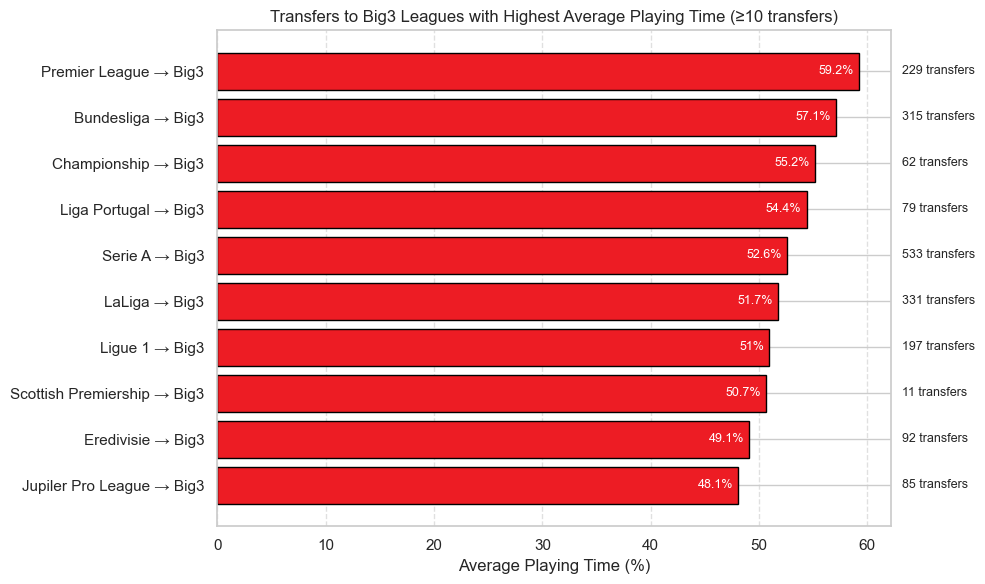

In [184]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(12, 6))

# Bar chart
bars = plt.barh(
    plt_5["from_competition_competition_name"] + " → " + plt_5["to_competition_grouped"],
    plt_5["avg_percentage_played"],
    color="#ED1C24",
    edgecolor="black"
)

# Determine fixed x-position for aligned transfer labels
x_fixed = plt_5["avg_percentage_played"].max() + 4

# Annotate bars
for bar, transfers, percentage in zip(bars, plt_5["transfers"], plt_5["avg_percentage_played"]):
    # Transfer label - aligned outside bar
    plt.text(
        x_fixed,
        bar.get_y() + bar.get_height() / 2,
        f"{transfers} transfers",
        va="center", ha="left", fontsize=9
    )

    # Percentage label - inside bar
    plt.text(
        bar.get_width() - 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{percentage:.3g}%",
        va="center", ha="right", color="white", fontsize=9
    )

# Labels and title
plt.xlabel("Average Playing Time (%)")
plt.title("Transfers to Big3 Leagues with Highest Average Playing Time (≥10 transfers)")

# Invert y-axis for better visual ranking
plt.gca().invert_yaxis()

# Grid and spacing
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# Show plot
plt.show()


In [185]:
plt_6 = Big3_league_transfers.sort_values(by = 'success_rate', ascending = False).head(10)

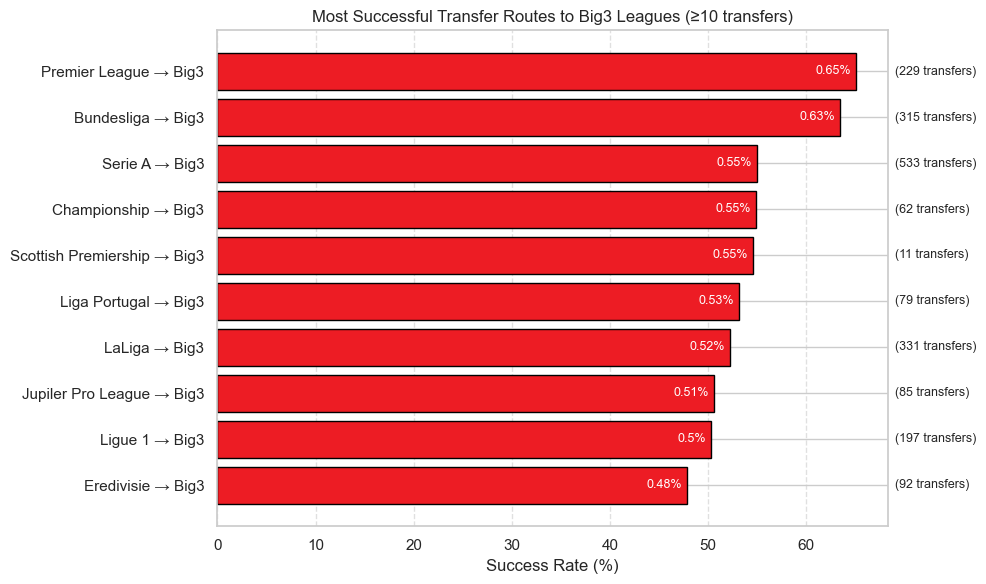

In [186]:
import matplotlib.pyplot as plt


# Create figure
plt.figure(figsize=(12, 6))

# Bar chart: x = success rate
bars = plt.barh(
    plt_6["from_competition_competition_name"] + " → " + plt_6["to_competition_grouped"],
    plt_6["success_rate"]*100,
    color="#ED1C24",
    edgecolor="black"
)

# Fixed x-position for aligned transfer labels
x_fixed = (plt_6["success_rate"]*100).max() + 4

# Annotate bars
for bar, transfers, success_rate in zip(
    bars, plt_6["transfers"], plt_6["success_rate"]
):
    # Transfer count aligned to same column
    plt.text(
        x_fixed,
        bar.get_y() + bar.get_height() / 2,
        f"({transfers} transfers)",
        va="center", ha="left", fontsize=9
    )

    # Success rate inside bar in white
    plt.text(
        bar.get_width() - 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{success_rate:.2g}%",
        va="center", ha="right", color="white", fontsize=9
    )

# Labels and formatting
plt.xlabel("Success Rate (%)")
plt.title("Most Successful Transfer Routes to Big3 Leagues (≥10 transfers)")

plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# Show the plot
plt.show()


## Players loaned out form Bundesliga

In [187]:
loaned_away = final_dataset[(final_dataset["from_competition_competition_name"] == "Bundesliga") & (final_dataset["isLoan"] == True)]

In [188]:
loaned_away.shape

(382, 78)

In [189]:
loan_counts = loaned_away['to_competition_competition_name'].value_counts()

# 3. Display the league with the most loans
print("Most common loan destination from Bundesliga:")
loan_counts.head(10)  # Top league

Most common loan destination from Bundesliga:


to_competition_competition_name
2. Bundesliga          98
3. Liga                50
Bundesliga             50
Eredivisie             27
Austrian Bundesliga    21
Serie A                14
Ligue 1                14
LaLiga                 11
Jupiler Pro League     11
Premier League          9
Name: count, dtype: int64

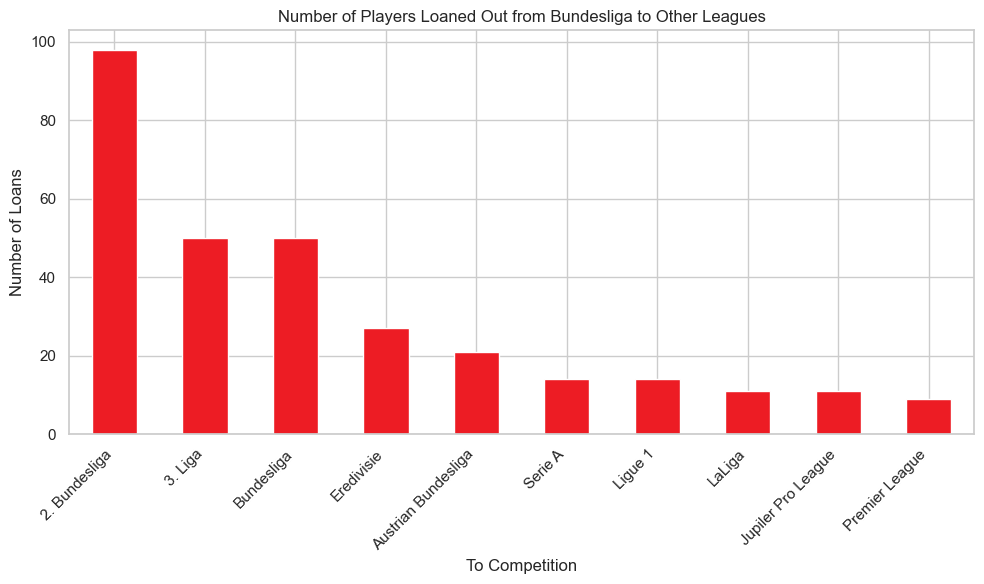

In [190]:
# Plot
plt.figure(figsize=(10, 6))
loan_counts.head(10).plot(kind='bar', color='#ED1C24')

plt.title('Number of Players Loaned Out from Bundesliga to Other Leagues')
plt.xlabel('To Competition')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [191]:
loan_success = (
    loaned_away
    .groupby(["from_competition_competition_name", "to_competition_competition_name"])
    .agg(
        success_rate=("success", "mean"),
        avg_percentage_played=("percentage_played", "mean"),
        transfers=("success", "count")
    )
    .reset_index()
)

In [192]:
loan_success.sort_values(by = "transfers", ascending = False).head(10)

,from_competition_competition_name,to_competition_competition_name,success_rate,avg_percentage_played,transfers
0,Bundesliga,2. Bundesliga,0.530612,54.270714,98
2,Bundesliga,3. Liga,0.660000,58.699800,50
5,Bundesliga,Bundesliga,0.640000,55.028400,50
9,Bundesliga,Eredivisie,0.666667,60.504815,27
3,Bundesliga,Austrian Bundesliga,0.714286,64.008571,21
18,Bundesliga,Ligue 1,0.714286,60.998571,14
29,Bundesliga,Serie A,0.571429,54.610000,14
12,Bundesliga,LaLiga,0.818182,69.009091,11
10,Bundesliga,Jupiler Pro League,0.818182,65.274545,11
22,Bundesliga,Premier League,0.333333,44.972222,9


In [193]:
plt_5 = loan_success.sort_values("avg_percentage_played", ascending = False)
plt_5 = plt_5[plt_5['transfers'] >= 5].head(10)

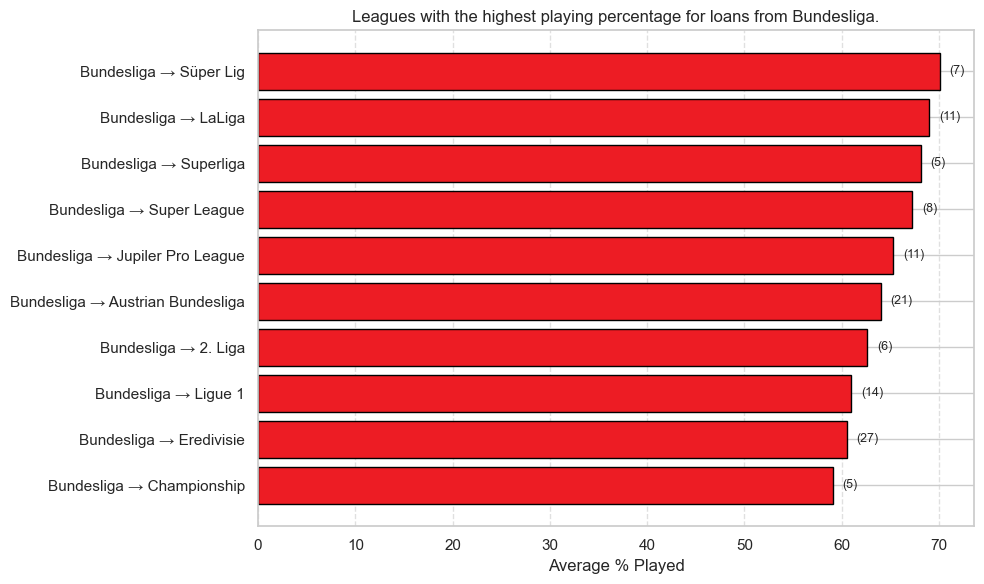

In [194]:
plt.figure(figsize=(10, 6))
bars = plt.barh(
    plt_5["from_competition_competition_name"] + " → " + plt_5["to_competition_competition_name"],
    plt_5["avg_percentage_played"],
    color="#ED1C24", edgecolor="black"
)

# Add labels for transfer counts
for i, (bar, transfers) in enumerate(zip(bars, plt_5["transfers"])):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"({transfers})", va="center", fontsize=9)

plt.xlabel("Average % Played")
plt.title("Leagues with the highest playing percentage for loans from Bundesliga.")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Players loaned out form Germany

In [195]:
unique_values = final_dataset["to_competition"].unique().tolist()
print(unique_values)

['L2', 'MLS1', 'L1', 'GB2', 'GB1', 'IT1', 'RLN3', 'GB3', 'GB4', 'SC1', 'IT2', 'BU1', 'TR1', 'PO1', 'IR1', 'AUS1', 'USL', 'BE2', 'JAP1', 'GR1', 'NL1', 'NL2', 'BE1', 'SE1', 'RLSW', 'L3', 'RLN4', 'RU1', 'FR1', 'RO1', 'C1', 'ES1', 'ES2', 'SA1', 'PL1', 'TS1', 'PO2', 'UKR1', 'C2', 'WAL1', 'SLO1', 'FR3', 'FI1', 'NO1', 'ISR1', 'A2', 'FR2', 'A1', 'RLW3', 'DK1', 'LUX1', 'NO2', 'LET1', 'RLB3', 'NIR1', 'SE2', 'MT1P', 'GE1N', 'CDN1', 'EST1', 'MO1N', 'SER1', 'KR1', 'KR2', 'BOS1', 'LI1', 'MNE1', 'UNG1', 'FI2', 'SL1', 'USC3', 'GZO1', 'RSK1', 'MOP2', 'DK2', 'MNP3']


In [196]:
loaned_away_country = final_dataset[(final_dataset["from_competition_competition_area"] == "Germany") & (final_dataset["isLoan"] == True)]

In [197]:
loaned_away_country.shape

(680, 78)

In [198]:
loan_counts_country = loaned_away_country['to_competition_competition_name'].value_counts()

# 3. Display the league with the most loans
print("Most common loan destination from Germany:")
loan_counts_country.head(10)  # Top league

Most common loan destination from Germany:


to_competition_competition_name
3. Liga                 137
2. Bundesliga           129
Bundesliga               53
Regionalliga Südwest     35
Austrian Bundesliga      34
Eredivisie               32
Regionalliga Nordost     26
Regionalliga West        23
Ligue 1                  17
Jupiler Pro League       16
Name: count, dtype: int64

In [199]:
loan_success_country = (
    loaned_away_country
    .groupby(["from_competition_competition_area", "to_competition_competition_name"])
    .agg(
        success_rate=("success", "mean"),
        avg_percentage_played=("percentage_played", "mean"),
        transfers=("success", "count")
    )
    .reset_index()
)

In [200]:
loan_success_country.head(10)

,from_competition_competition_area,to_competition_competition_name,success_rate,avg_percentage_played,transfers
0,Germany,2. Bundesliga,0.534884,54.167907,129
1,Germany,2. Liga,0.461538,50.884615,13
2,Germany,3. Liga,0.598540,56.992993,137
3,Germany,Allsvenskan,1.000000,64.680000,1
4,Germany,Austrian Bundesliga,0.617647,56.734412,34
5,Germany,BGL Ligue,0.666667,55.363333,3
6,Germany,Bundesliga,0.622642,53.382830,53
7,Germany,Challenge League,0.500000,42.800000,2
8,Germany,Challenger Pro League,0.000000,30.390000,1
9,Germany,Championship,0.571429,50.510000,7


In [201]:
plt_6 = loan_success_country.sort_values("avg_percentage_played", ascending = False)
plt_6 = plt_6[plt_6['transfers'] >= 5].head(10)

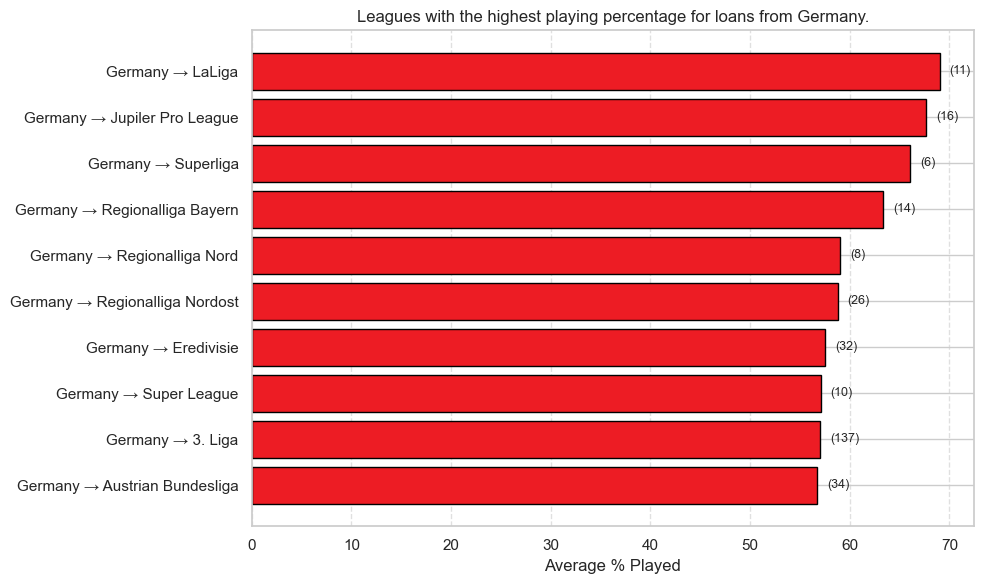

In [202]:
plt.figure(figsize=(10, 6))
bars = plt.barh(
    plt_6["from_competition_competition_area"] + " → " + plt_6["to_competition_competition_name"],
    plt_6["avg_percentage_played"],
    color="#ED1C24", edgecolor="black"
)

# Add labels for transfer counts
for i, (bar, transfers) in enumerate(zip(bars, plt_6["transfers"])):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"({transfers})", va="center", fontsize=9)

plt.xlabel("Average % Played")
plt.title("Leagues with the highest playing percentage for loans from Germany.")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

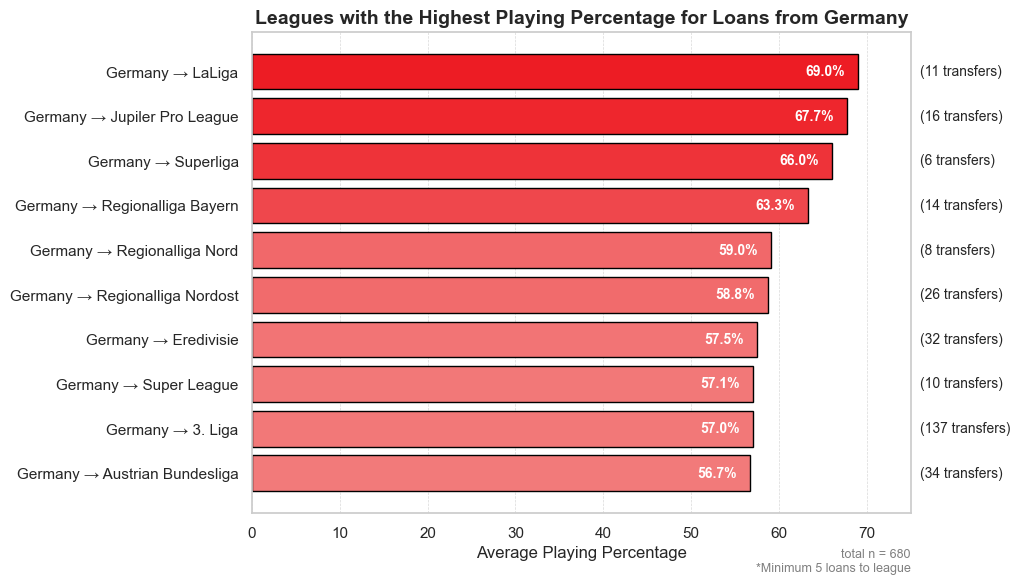

In [248]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Normalize avg_percentage_played for color gradient
norm = mcolors.Normalize(
    vmin=plt_6["avg_percentage_played"].min(),
    vmax=plt_6["avg_percentage_played"].max()
)

# Custom red color map
cmap = mcolors.LinearSegmentedColormap.from_list("custom_red", ["#f27a7a", "#ED1C24"])
colors = [cmap(norm(value)) for value in plt_6["avg_percentage_played"]]

# External label position
x_fixed = plt_6["avg_percentage_played"].max() + 7

# Total number of loans (optional if you want to annotate total)
total_n = final_dataset[(final_dataset["from_competition_competition_area"] == "Germany") & (final_dataset["isLoan"] == True)].shape[0]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(
    plt_6["from_competition_competition_area"] + " → " + plt_6["to_competition_competition_name"],
    plt_6["avg_percentage_played"],
    color=colors,
    edgecolor="black"
)

# Add annotations
for bar, transfers, avg_percentage_played in zip(bars, plt_6["transfers"], plt_6["avg_percentage_played"]):
    plt.text(
        x_fixed,
        bar.get_y() + bar.get_height() / 2,
        f"({transfers} transfers)",
        va="center", fontsize=10
    )
    plt.text(
        bar.get_width() - 1.5,
        bar.get_y() + bar.get_height() / 2,
        f"{avg_percentage_played:.1f}%",
        va="center", ha="right", color="white", fontsize=10, weight='bold'
    )

# Title and labels
plt.title("Leagues with the Highest Playing Percentage for Loans from Germany", fontsize=14, weight='bold')
plt.xlabel("Average Playing Percentage", fontsize=12)
plt.xlim(0, 75)
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, color='gray', alpha=0.3)

plt.text(
    plt.xlim()[1],
    plt.ylim()[0] + 0.8,
    f"total n = {total_n}\n*Minimum 5 loans to league",
    ha='right', va='top',
    fontsize=9, color='gray'
)

plt.grid(False, axis='y')
plt.tight_layout()
plt.subplots_adjust(left=0.35)
plt.savefig("Loans_From_Germany.png", dpi=300, bbox_inches='tight')

## Transfer Success by Position

In [203]:
final_dataset.columns

Index(['playerId', 'playerName', 'height', 'mainPosition', 'positionGroup',
       'foot', 'nationality', 'date', 'season', 'transferAge',
       'transfer_age_grouped', 'young_player_transfer', 'isLoan', 'wasLoan',
       'fee', 'marketvalue_closest', 'fee_to_value_ratio', 'foreign_transfer',
       'from_team', 'from_teamId', 'from_competition',
       'from_competition_competition_name',
       'from_competition_competition_area',
       'from_competition_competition_age_category',
       'from_competition_competition_level',
       'from_competition_competition_association', 'fromTeam_marketValue',
       'to_team', 'to_teamId', 'to_competition',
       'to_competition_competition_name', 'to_competition_competition_area',
       'to_competition_competition_age_category',
       'to_competition_competition_level',
       'to_competition_competition_association', 'toTeam_marketValue',
       'team_market_value_relation', 'start_date', 'end_date',
       'total_minutes_played', 'total

In [204]:
# Group by position group and calculate mean of relevant columns
position_stats = final_dataset.groupby('positionGroup')[['percentage_played', 'success']].mean()

# Optional: sort by playing percentage or success rate
position_stats = position_stats.sort_values(by='percentage_played', ascending=False)

# Display result
position_stats.head(10)

,percentage_played,success
positionGroup,,
defender,60.187427,0.650729
midfielder,53.660761,0.568401
attacker,48.734927,0.490018
goalkeeper,41.728980,0.411414


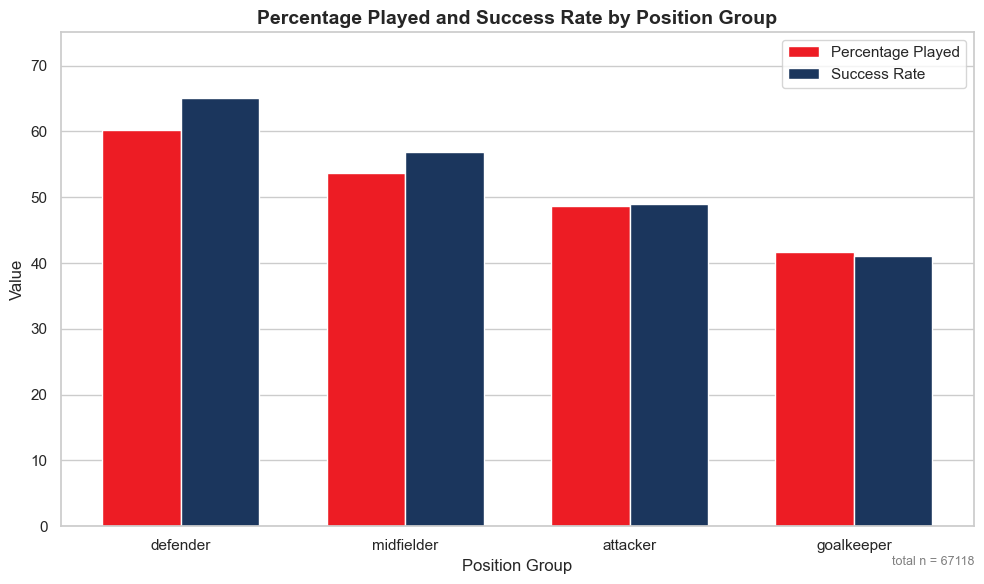

In [205]:
import numpy as np

df_plot = position_stats  # Replace with your actual DataFrame name
categories = df_plot.index.tolist()
percentage_played = df_plot['percentage_played'].values
success_rate = df_plot['success'].values *100
total_n = final_dataset['percentage_played'].notna().sum()

x = np.arange(len(categories))  # the label locations
width = 0.35  # width of the bars

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, percentage_played, width, label='Percentage Played', color='#ED1C24')
bars2 = ax.bar(x + width/2, success_rate, width, label='Success Rate', color='#1B365D')

# Labels and formatting
ax.set_xlabel('Position Group')
ax.set_ylabel('Value')
ax.set_title('Percentage Played and Success Rate by Position Group', fontsize=14, weight='bold')
#plt.title("Top 10 Most Successful Nationalities Transferring into Bundesliga\n(by Average Playing Percentage)", fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, max(max(percentage_played), max(success_rate)) + 10)

plt.text(
    plt.xlim()[1],
    plt.ylim()[0] - 4.5,
    f"total n = {total_n}",
    ha='right', va='top',
    fontsize=9, color='gray'
)

plt.grid(False, axis = 'x')  # turns off vertical grid lines

plt.tight_layout()
plt.savefig("Position.png", dpi=300, bbox_inches='tight')
#plt.show()

## What leagues do German loans imrpove in the most?

In [206]:
loaned_away = final_dataset[
    (final_dataset['from_competition_competition_name'].isin(['Bundesliga', 'La Liga', 'Serie A'])) 
    & 
    (final_dataset['isLoan'] == True)
]


In [207]:
loaned_away.shape

(1199, 78)

In [208]:
percentage_played_on_loan = loaned_away[["percentage_played_before", "playerName", "to_competition_competition_name", "playerId", "from_team", "to_team"]]
percentage_played_on_loan = percentage_played_on_loan.dropna(subset=['percentage_played_before'])
percentage_played_on_loan.shape

(843, 6)

In [209]:
percentage_played_on_loan.head(10)

,percentage_played_before,playerName,to_competition_competition_name,playerId,from_team,to_team
331,62.12,Antonio Candreva,Serie A,25488,Inter Mailand,Sampdoria Genua
333,96.67,Antonio Candreva,Serie A,25488,Sampdoria Genua,US Salernitana 1919
500,16.07,Armando Izzo,Serie A,32113,FC Turin,AC Monza
554,71.39,Massimo Coda,Serie B,33763,Genua CFC,US Cremonese
941,73.03,Marko Arnautovic,Serie A,41384,FC Bologna,Inter Mailand
1003,12.63,Salvatore Bocchetti,Serie B,42678,Hellas Verona,Delfino Pescara 1936
1825,88.99,Matteo Darmian,Serie A,54906,Parma Calcio 1913,Inter Mailand
1932,49.84,Oliver Kragl,Serie B,56513,Benevento Calcio,Ascoli Calcio
1977,90.49,Sebastian Rudy,Bundesliga,57051,FC Schalke 04,TSG 1899 Hoffenheim
2193,19.49,Iago Falque,Serie A,59340,FC Turin,Benevento Calcio


In [210]:
came_back = final_dataset[
    (final_dataset["to_competition_competition_name"].isin(["Bundesliga", "La Liga", "Serie A"])) 
    & 
    (final_dataset["wasLoan"] == True)
]

percentage_played_after_loan = came_back[["percentage_played", "playerId", "from_team", "to_team"]]

In [211]:
came_back.shape

(363, 78)

In [212]:
percentage_played_on_loan = percentage_played_on_loan.rename(columns={
    'to_team': 'loan_team',
    'from_team': 'bundesliga_team'
})

percentage_played_after_loan = percentage_played_after_loan.rename(columns={
    'from_team': 'loan_team',  # match name for merge
    'to_team': 'bundesliga_team'
})

In [213]:
merged_df = percentage_played_on_loan.merge(
    percentage_played_after_loan,
    on=['playerId', 'loan_team', 'bundesliga_team'],
    how='inner',
    suffixes=('_before', '_after')
)

In [214]:
merged_df['improvement'] = (
    merged_df['percentage_played'] - merged_df['percentage_played_before']
)

In [215]:
merged_df.head(10)

,percentage_played_before,playerName,to_competition_competition_name,playerId,bundesliga_team,loan_team,percentage_played,improvement
0,23.86,Mattia De Sciglio,Ligue 1,88682,Juventus Turin,Olympique Lyon,47.98,24.12
1,58.89,Antonino Ragusa,Serie B,102470,Hellas Verona,Brescia Calcio,12.66,-46.23
2,46.79,Diego Falcinelli,Super Liga Srbije,119115,FC Bologna,Roter Stern Belgrad,5.65,-41.14
3,93.62,Jeison Murillo,LaLiga,131102,Sampdoria Genua,Celta Vigo,36.67,-56.95
4,8.61,Jordan Lukaku,Jupiler Pro League,140804,Lazio Rom,Royal Antwerpen FC,54.94,46.33
5,49.06,Louis Schaub,Super League,147485,1.FC Köln,FC Luzern,20.85,-28.21
6,37.78,Kingsley Schindler,2. Bundesliga,153678,1.FC Köln,Hannover 96,13.74,-24.04
7,25.00,Alessandro Micai,Serie B,167685,US Salernitana 1919,Reggina 1914,67.86,42.86
8,10.67,Mattia Valoti,Serie B,167741,AC Monza,Pisa Sporting Club,15.56,4.89
9,35.80,Nicolas Haas,Super League,192638,FC Empoli,FC Luzern,26.02,-9.78


In [216]:
loan_improvement = merged_df[["playerName", "playerId", "improvement", "to_competition_competition_name"]]

In [217]:
loan_improvement.shape

(104, 4)

In [218]:
grouped_df = (
    loan_improvement.groupby('to_competition_competition_name')
      .agg(
          mean_improvement=('improvement', 'mean'),
          total_loans=('improvement', 'count')
      )
      .reset_index()
      .sort_values(by='mean_improvement', ascending=False)
)


In [219]:
grouped_df.head(10)

,to_competition_competition_name,mean_improvement,total_loans
9,League One,21.630000,1
6,Jupiler Pro League,20.945000,6
13,Premier League,8.050000,4
5,Eredivisie,5.591666,6
19,SuperSport HNL,4.590000,1
15,Serie B,2.587576,33
0,2. Bundesliga,-0.372667,15
1,3. Liga,-1.488000,5
3,Championship,-2.680000,2
7,Keuken Kampioen Divisie,-3.380000,3


In [220]:
jupiler_pro_league_loans = merged_df[merged_df["to_competition_competition_name"] == "Jupiler Pro League"]

In [221]:
jupiler_pro_league_loans.head(6)

,percentage_played_before,playerName,to_competition_competition_name,playerId,bundesliga_team,loan_team,percentage_played,improvement
4,8.610000,Jordan Lukaku,Jupiler Pro League,140804,Lazio Rom,Royal Antwerpen FC,54.94,46.330000
35,31.210000,Christian Kouamé,Jupiler Pro League,337725,AC Florenz,RSC Anderlecht,54.71,23.500000
57,39.130000,Jens Petter Hauge,Jupiler Pro League,422355,Eintracht Frankfurt,KAA Gent,42.80,3.670000
70,30.350000,Rocco Reitz,Jupiler Pro League,467434,Borussia Mönchengladbach,VV St. Truiden,42.15,11.800000
71,30.350000,Rocco Reitz,Jupiler Pro League,467434,Borussia Mönchengladbach,VV St. Truiden,70.07,39.720000
91,0.000001,Karim Zedadka,Jupiler Pro League,612065,SSC Neapel,R Charleroi SC,0.65,0.649999


In [222]:
final_dataset["percentage_played"].max()

np.float64(100.0)

In [223]:
Jordan_Lukaku = final_dataset[final_dataset["playerName"] == "Jordan Lukaku"]

In [224]:
Jordan_Lukaku.to_csv("Jordan_Lukaku.csv", index = False)

## Loans England

In [225]:
loaned_away_england = final_dataset[(final_dataset["from_competition_competition_area"] == "England") & (final_dataset["isLoan"] == True)]

In [226]:
loaned_away_england.shape

(894, 78)

In [227]:
loan_counts_england = loaned_away_england['to_competition_competition_name'].value_counts()

# 3. Display the league with the most loans
print("Most common loan destination from England:")
loan_counts_england.head(10)  # Top league

Most common loan destination from England:


to_competition_competition_name
Championship            175
League One              140
League Two              107
Scottish Premiership     55
LaLiga                   47
Ligue 1                  41
Serie A                  38
Jupiler Pro League       33
Premier League           33
Süper Lig                31
Name: count, dtype: int64

In [228]:
loan_success_england = (
    loaned_away_england
    .groupby(["from_competition_competition_area", "to_competition_competition_name"])
    .agg(
        success_rate=("success", "mean"),
        avg_percentage_played=("percentage_played", "mean"),
        transfers=("success", "count")
    )
    .reset_index()
)

In [229]:
loan_success_england.head(10)

,from_competition_competition_area,to_competition_competition_name,success_rate,avg_percentage_played,transfers
0,England,2. Bundesliga,0.700000,62.811000,10
1,England,A-League Men,0.666667,75.866667,3
2,England,Allsvenskan,0.666667,56.196667,3
3,England,Austrian Bundesliga,1.000000,77.240000,6
4,England,Bundesliga,0.703704,67.166296,27
5,England,Challenge League,1.000000,73.490000,3
6,England,Challenger Pro League,0.600000,56.394000,5
7,England,Championship,0.697143,62.827486,175
8,England,Chance Liga,1.000000,100.000000,1
9,England,Cymru Premier,1.000000,74.782000,5


In [230]:
loan_success_england = loan_success_england[loan_success_england['transfers'] >= 5]
loan_success_england.sort_values("avg_percentage_played", ascending = False).head(10)

,from_competition_competition_area,to_competition_competition_name,success_rate,avg_percentage_played,transfers
22,England,Major League Soccer,1.000000,81.738889,9
17,England,League of Ireland Premier Division,0.923077,78.616923,13
3,England,Austrian Bundesliga,1.000000,77.240000,6
9,England,Cymru Premier,1.000000,74.782000,5
11,England,Jupiler Pro League,0.848485,73.050909,33
16,England,League Two,0.775701,68.950280,107
32,England,Super League,0.777778,68.947778,9
38,England,Süper Lig,0.709677,68.812581,31
4,England,Bundesliga,0.703704,67.166296,27
15,England,League One,0.735714,66.441286,140


In [231]:
final_dataset.columns

Index(['playerId', 'playerName', 'height', 'mainPosition', 'positionGroup',
       'foot', 'nationality', 'date', 'season', 'transferAge',
       'transfer_age_grouped', 'young_player_transfer', 'isLoan', 'wasLoan',
       'fee', 'marketvalue_closest', 'fee_to_value_ratio', 'foreign_transfer',
       'from_team', 'from_teamId', 'from_competition',
       'from_competition_competition_name',
       'from_competition_competition_area',
       'from_competition_competition_age_category',
       'from_competition_competition_level',
       'from_competition_competition_association', 'fromTeam_marketValue',
       'to_team', 'to_teamId', 'to_competition',
       'to_competition_competition_name', 'to_competition_competition_area',
       'to_competition_competition_age_category',
       'to_competition_competition_level',
       'to_competition_competition_association', 'toTeam_marketValue',
       'team_market_value_relation', 'start_date', 'end_date',
       'total_minutes_played', 'total

In [232]:
filtered_df = final_dataset[
    (final_dataset['from_competition_competition_area'] == 'England') &
    (final_dataset['to_competition_competition_name'] == 'Major League Soccer') &
    (final_dataset["isLoan"] == True)
]

In [233]:
filtered_df[["playerName", "season", "to_team"]].head(9)

,playerName,season,to_team
738,Winston Reid,2019,Sporting Kansas City
9686,Jürgen Locadia,2019,FC Cincinnati
35996,Richie Laryea,2022,Toronto FC
37337,Tom Edwards,2020,New York Red Bulls
37338,Tom Edwards,2021,New York Red Bulls
42682,Braian Ojeda,2022,Real Salt Lake City
44453,Lukas Engel,2024,FC Cincinnati
52070,Leonardo Campana,2021,Inter Miami CF
59102,Yerson Mosquera,2022,FC Cincinnati


## New Plots

In [234]:
final_dataset.columns

Index(['playerId', 'playerName', 'height', 'mainPosition', 'positionGroup',
       'foot', 'nationality', 'date', 'season', 'transferAge',
       'transfer_age_grouped', 'young_player_transfer', 'isLoan', 'wasLoan',
       'fee', 'marketvalue_closest', 'fee_to_value_ratio', 'foreign_transfer',
       'from_team', 'from_teamId', 'from_competition',
       'from_competition_competition_name',
       'from_competition_competition_area',
       'from_competition_competition_age_category',
       'from_competition_competition_level',
       'from_competition_competition_association', 'fromTeam_marketValue',
       'to_team', 'to_teamId', 'to_competition',
       'to_competition_competition_name', 'to_competition_competition_area',
       'to_competition_competition_age_category',
       'to_competition_competition_level',
       'to_competition_competition_association', 'toTeam_marketValue',
       'team_market_value_relation', 'start_date', 'end_date',
       'total_minutes_played', 'total

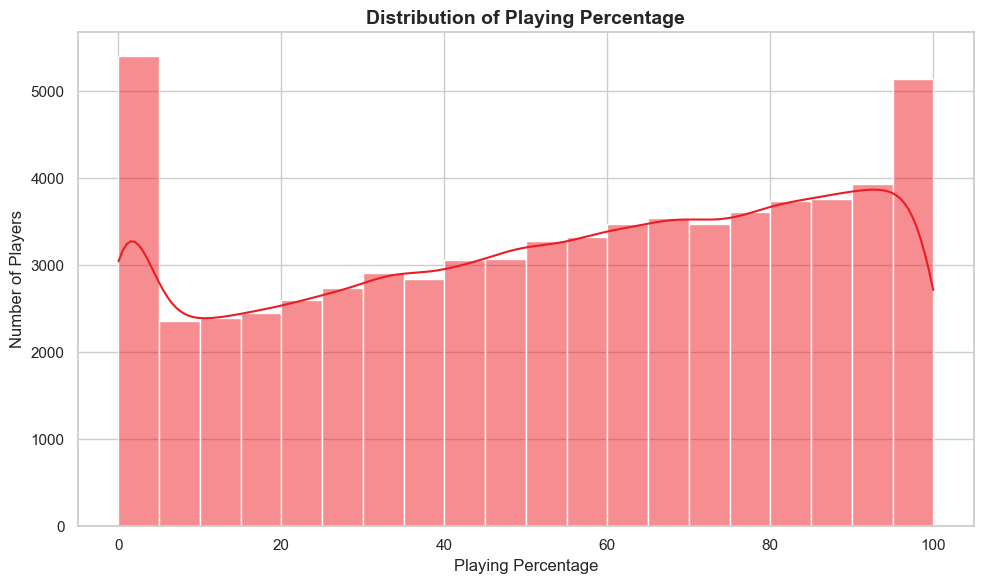

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme for clean style
sns.set_theme(style="whitegrid")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=final_dataset,
    x='percentage_played',
    bins=20,
    kde=True,                  # Optional: adds smooth curve
    color="#ED1C24"            # Use any color you like
)

# Add labels and title
plt.title("Distribution of Playing Percentage", fontsize=14, weight='bold')
plt.xlabel("Playing Percentage", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.tight_layout()

plt.show()


In [236]:
# Define age groups
bins = [16, 21, 27, 35]
labels = ['Young (16–21)', 'Middle (22–27)', 'Older (28–35)']

final_dataset['age_group'] = pd.cut(final_dataset['transferAge'], bins=bins, labels=labels, right=True)


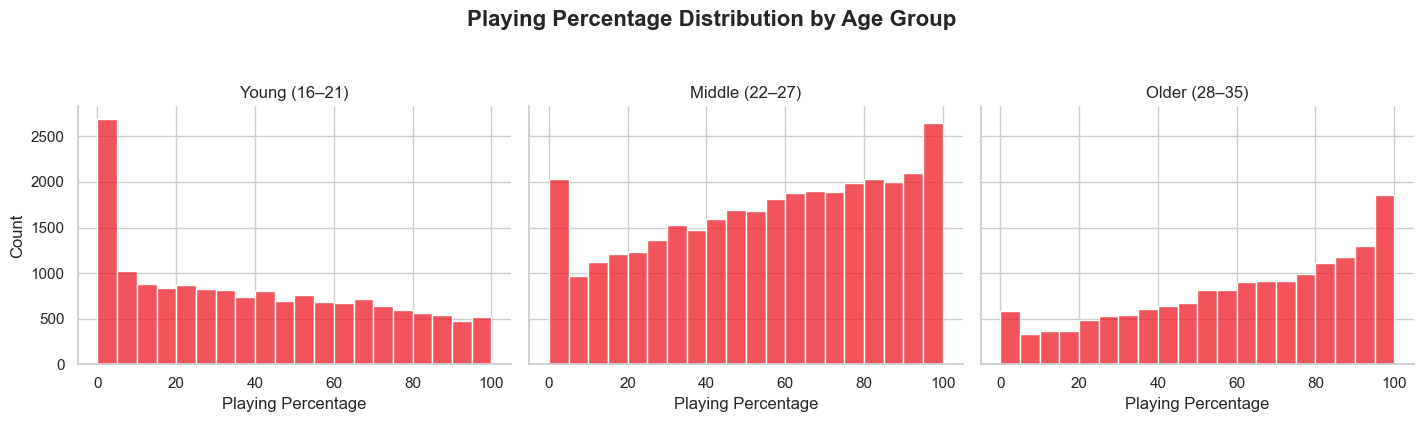

In [237]:
g = sns.displot(
    data=final_dataset,
    x='percentage_played',
    col='age_group',
    col_wrap=3,
    bins=20,
    height=4,
    aspect=1.2,
    color="#ED1C24"
)

g.set_titles("{col_name}")
g.set_axis_labels("Playing Percentage", "Count")
plt.suptitle("Playing Percentage Distribution by Age Group", fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.show()

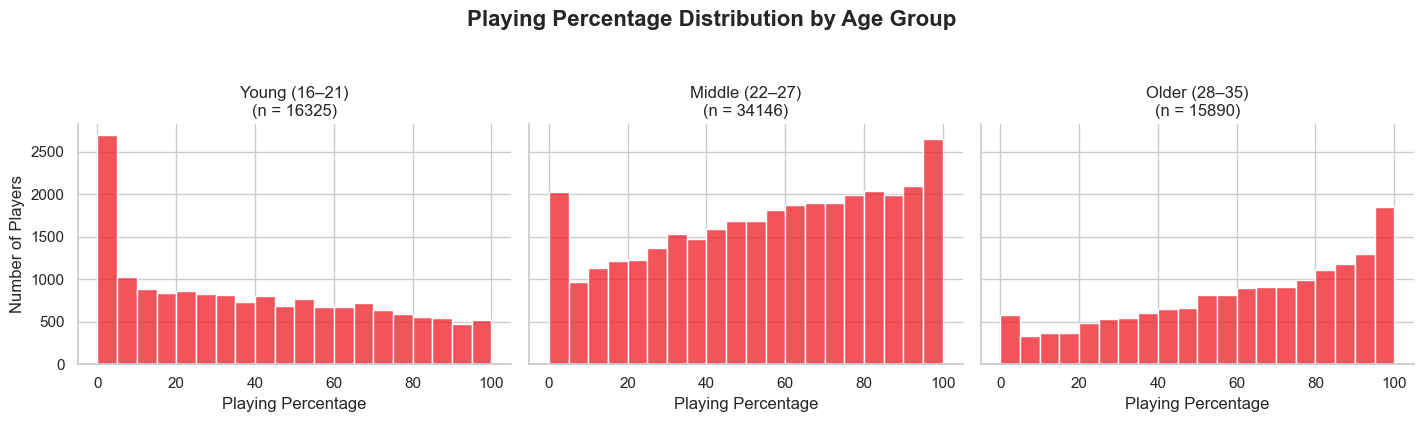

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count number of players per age group
group_counts = final_dataset['age_group'].value_counts().to_dict()

# Create the FacetGrid
g = sns.displot(
    data=final_dataset,
    x='percentage_played',
    col='age_group',
    col_wrap=3,
    bins=20,
    height=4,
    aspect=1.2,
    color="#ED1C24"
)

# Update each subplot title to include count
for ax in g.axes.flat:
    title_text = ax.get_title()
    group_label = title_text.split('=')[-1].strip()
    count = group_counts.get(group_label, 0)
    ax.set_title(f"{group_label}\n(n = {count})")

# Labels and layout
g.set_axis_labels("Playing Percentage", "Number of Players")
plt.suptitle("Playing Percentage Distribution by Age Group", fontsize=16, weight='bold', y=1.05)
plt.tight_layout()
plt.show()
